## Linear Regression 

Linear Regression is one of the easiest algorithms in machine learning.

In this, we will establish a linear relationship between the input variables(X) and single output variable(Y). When the input(X) is a single variable this model is called **Simple Linear Regression** and when there are mutiple input variables(X), it is called **Multiple Linear Regression**.

For each problem you have to do the following:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test and validation set.

7.Build Model. 

8.Apply the model.

9.Evaluate the model.

10.Provide insights.


## Simple Linear Regression

In this problem we have an input variable - X and one output variable - Y. And we want to build linear relationship between these variables. 

## Problem Statement

Using Simple Linear Regression **predict the population** of different cities in dataset given their population 10 years back. Try to construct a relation for the increase in the population. 

## Dataset

Population of U.S. Cities

### Description
The bigcity data frame has 49 rows and 2 columns.

The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken from the 196 largest cities in 1920.

### Format
This data frame contains the following columns:

`u`
The 1920 population.

`x`
The 1930 population.

Source

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press.

## Question 1

*Read the dataset given in file named **'bigcity.csv'**.*

#### Answer:

In [2]:
# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   
import matplotlib.style
#plt.style.use('classic')

#importing seaborn for statistical plots
import seaborn as sns

from sklearn.model_selection import train_test_split

In [38]:
bigcity = pd.read_csv('bigcity.csv')
bigcity = bigcity.iloc[:,1:3]
bigcity.head()

,u,x
0,138,143
1,93,104
2,61,69
3,179,260
4,48,75


## Question 2 - Transform the dataset

*Find the number of records in given dataset and separate the input and target variables into new variables with names **X** and **Y**.*

#### Answer:

In [39]:
bigcity.describe()

,u,x
count,49.000000,49.000000
mean,103.142857,127.795918
std,104.405061,123.121211
min,2.000000,46.000000
25%,43.000000,58.000000
50%,64.000000,79.000000
75%,120.000000,130.000000
max,507.000000,634.000000


In [3]:
len(bigcity)

49

In [40]:
#x = bigcity.iloc[:,1]
#y = bigcity.iloc[:,0]
x=bigcity['u']
y=bigcity['x']

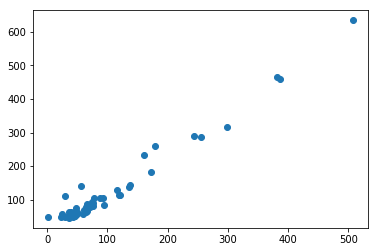

In [34]:
plt.scatter(x,y)

## Question 3 - Split data into train, test sets

*Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.*

#### Answer:

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

In [42]:
x_train = x_train.reshape(len(x_train),1)
y_train = y_train.reshape(len(y_train),1)
x_test = x_test.reshape(len(x_test),1)
y_test = y_test.reshape(len(y_test),1)
print (x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(39, 1) (10, 1) (39, 1) (10, 1)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


## Question 4 - Model

*Estimate the coefficients b0 and b1 using **scikit-learn**.* 

#### Answer:

In [43]:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:
#for idx, col_name in enumerate(x_train.columns):
 #   print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

In [44]:
b1 = regression_model.coef_[0][0]
print("The coefficient is {}".format(b1))

The coefficient is 1.1594512342174779


In [45]:
b0 = regression_model.intercept_[0]
print("The intercept is {}".format(b0))

The intercept is 9.718455322828262


## Question 5 - Linear Relationship between feature and target

*Plot the line with b1 and b0 as slope and y-intercept.*

#### Answer:

Text(0.5,1,'regression line')

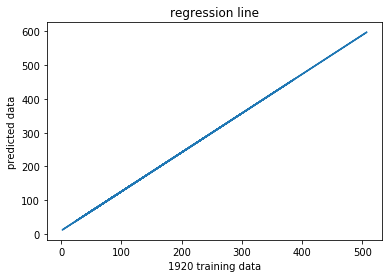

In [79]:
plt.plot(x_train, x_train*b1 + b0)
plt.xlabel('1920 training data')
plt.ylabel('predicted data')
plt.title('regression line')

## Question 6 - Predict population

Apply the model on the test set and compare the Actual and Predicted values.

#### Answer:

In [46]:
y_pred = regression_model.predict(x_test)

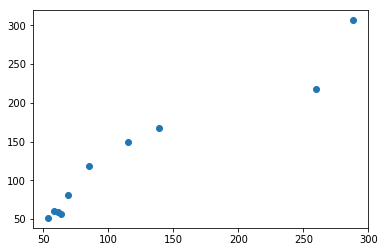

In [11]:
plt.scatter(y_test,y_pred)

In [12]:
mse = np.mean((y_pred-y_test)**2)

In [15]:
np.sqrt(mse)

23.385235190249123

## Question 7 - Evaluation of model with scikit-learn

*Validate the model with Root Mean Squares error and R^2 score using scikit-learn.*

#### Answer:

In [47]:
regression_model.score(x_train, y_train)

0.9682175540860046

In [51]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_train, y_pred))

23.18943724391406

In [18]:
regression_model.score(x_test, y_test)

0.9181922560396981

## Question 8 - Model [Bonus]

*Estimate the parameters(coefficients of the model) **b1** and **b0** in **Ordinary Least square method**.*

#### Answer:

In [19]:
bigcity_train = pd.concat([pd.DataFrame(x_train, dtype=np.int), pd.DataFrame(y_train, dtype=np.int)], axis=1, 
                          ignore_index=True)
bigcity_train.columns = ['x','y']
bigcity_train.head()

,x,y
0,36,46
1,121,113
2,60,57
3,172,183
4,387,459


In [24]:
import statsmodels.formula.api as smf
lm = smf.ols(formula= 'y ~ x', data = bigcity_train).fit()
print('parameters', lm.params, 'Rsquared', lm.rsquared)


parameters Intercept    9.718455
x            1.159451
dtype: float64 Rsquared 0.9682175540860046


## Question 9 - Evaluation [Bonus]

*Calculate error using **Root Mean Squares** method.*

#### Answer:

In [29]:
y_pred = lm.predict(x)
rmse = np.sqrt(np.mean((y_pred-y)**2))
rmse

23.229530043881635

## Question 10

*Give your understanding on RMSE, SS_t, SS_r, R-Square scores.*

RMSE: Root mean square error:  This indicates the standard deviation of errors of predicted vs actual values i.e. 
        it indicates how far the predicted values are from actual values. 
        in our model.
        
        
SS_T: Total Sum of Squared errors: This indicates the variance of actual values from expected values (expected value 
        is the mean )
        
        
SS_R: Sum of square of Residuals: This is the variance of predicted values from actual values. This indicates the 
        unexplained variance in the data.
        
        
R-Square: Coefficient of Determination: this is a measure of how well the regression line fits the data. 
        Higher value indicates a better fit.


## Multiple Linear Regression

## Problem Statement

Use Multiple Linear Regression to **predict the consumption of petrol** given relevant variables are the petrol tax, the per capita income, the number of miles of paved highway, and the proportion of the population with driver's licenses.

## Dataset

There are 48 rows of data.  The data include:

      index;
      petrol tax;
      per capita income;
      number of miles of paved highway;
      proportion of drivers;
      the consumption of petrol.

### Reference 

    Helmut Spaeth,
    Mathematical Algorithms for Linear Regression,
    Academic Press, 1991,
    ISBN 0-12-656460-4.

    S Weisberg,
    Applied Linear Regression,
    New York, 1980, pages 32-33.

## Question 1 - Exploratory Data Analysis

*Read the dataset given in file named **'petrol.csv'**. Check the statistical details of the dataset.*

**Hint:** You can use **df.describe()**

#### Answer:

In [77]:
petrol = pd.read_csv('petrol.csv')
petrol.head()

,tax,income,highway,dl,consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [78]:
petrol.describe()

,tax,income,highway,dl,consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


*Plot the scatter matrix to understand the distributions of each varible and its asscociation with other variables.*

#### Answer:

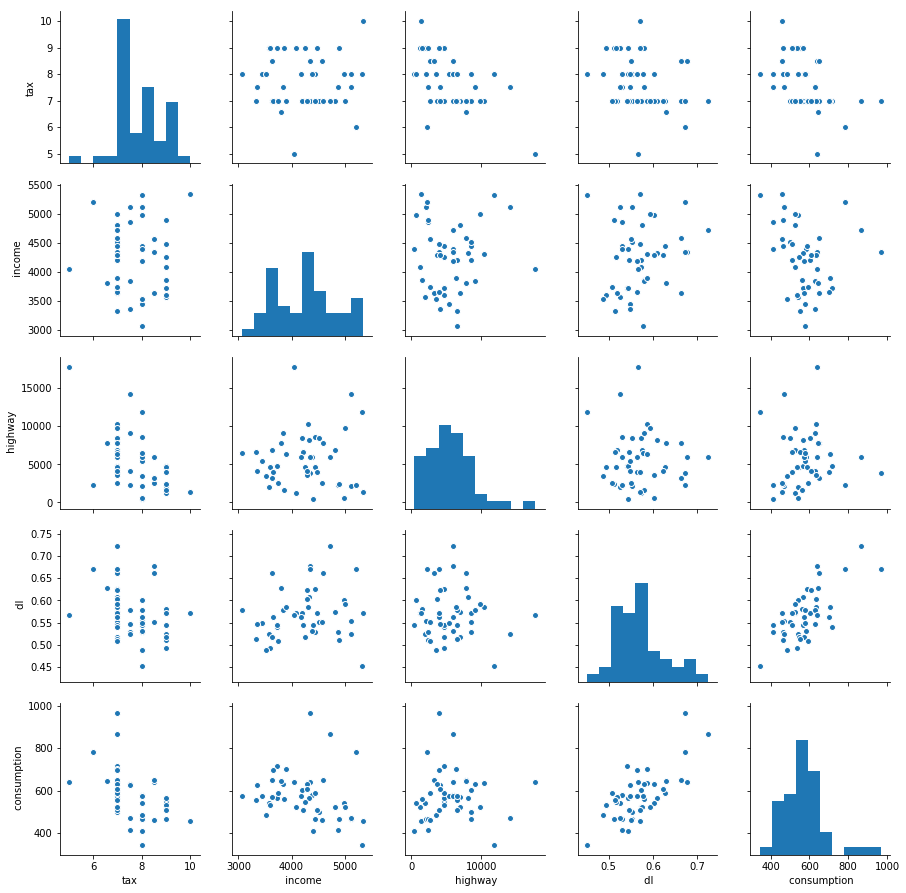

In [33]:
sns.pairplot(petrol)

## Question 2 - Drop outliers

Find the outliers and drop such records(consider a value is outlier if its > 1.5*IQR).

#### Answer:

In [66]:
from scipy.stats import iqr
iqr(petrol, axis=0)

array([1.12500e+00, 8.39750e+02, 4.04575e+03, 6.55000e-02, 1.23250e+02])

In [79]:

q1 = petrol.quantile(0.25)
q3 = petrol.quantile(0.75)
iqr = q3-q1
quant_ptr = petrol.quantile([0.25, 0.75])
quant_ptr




,tax,income,highway,dl,consumption
0.25,7.000,3739.00,3110.25,0.52975,509.50
0.75,8.125,4578.75,7156.00,0.59525,632.75


In [80]:
low = abs(q1 * 2 - q3)
high = abs(q3 * 2 - q1)
petr_sub = (petrol[(petrol >= low) & (petrol <= high)]).dropna()
len(petr_sub)

36

## Question 3 - Independent variables and collinearity

Which attributes seems to have stronger association with the dependent variable **consumption**?

#### Answer:

In [69]:
petr_sub.corr()
#tax and income have relatively higher association with consumption though the association is still not strong

,tax,income,highway,dl,consumption
tax,1.000000,-0.026009,-0.546129,-0.413349,-0.451099
income,-0.026009,1.000000,0.035137,0.217305,-0.494660
highway,-0.546129,0.035137,1.000000,0.289570,0.240978
dl,-0.413349,0.217305,0.289570,1.000000,0.403711
consumption,-0.451099,-0.494660,0.240978,0.403711,1.000000


## Selecting features based on correlation values

#### *i) Perform regression without highway and income features.*

In [81]:
pet = petrol.drop([' highway', ' income' ], axis=1)

## Question 4 - Transform the dataset

*Divide the data into feature(X) and target(Y) sets (without highway and income features).*

#### Answer:



In [116]:
X = pet.drop(' consumption', axis=1)
Y = pet[' consumption']

## Question 5 - Split data into train, test sets

*Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.*

#### Answer:

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [128]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(38, 2)
(38,)
(10, 2)
(10,)


In [129]:
Y_train = Y_train.reshape(len(Y_train),1)
Y_test = Y_test.reshape(len(Y_test),1)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


## Question 6 - Build Model

*Estimate the coefficients for each input feature. Construct and display a dataframe with coefficients and X.columns as columns.*

#### Answer:

In [120]:
regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [121]:
regression_model.coef_

array([[ -35.8466922 , 1250.74359577]])

In [122]:
regression_model.intercept_

array([134.61423099])

In [123]:
coeff_pet = pd.DataFrame(regression_model.coef_ , columns = X_train.columns)  
coeff_pet

,tax,dl
0,-35.846692,1250.743596


## Question 7 - Apply the model (Predict the petrol consumption)

*Compare the predicted values by the model with the actual values. Calculate predictions for X_test and store in y_pred variable. Construct and display a dataframe with y_test and y_pred as columns.*

#### Answer:

In [125]:
Y_pred = regression_model.predict(X_test)

In [134]:
df = pd.concat([pd.DataFrame(Y_test), pd.DataFrame(Y_pred)],axis=1)
df.columns = ['Y_test','Y_pred']
df

,Y_test,Y_pred
0,628,549.920786
1,547,458.628440
2,648,659.160351
3,640,663.301645
4,561,537.425287
5,414,527.407402
6,554,525.318850
7,577,533.248184
8,782,760.033774
9,631,589.944581


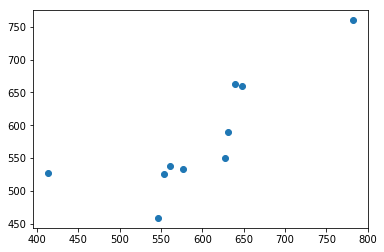

In [135]:
plt.scatter(Y_test,Y_pred)

In [138]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(Y_test, Y_pred))

57.35443694791336

## R-Square and Adjusted R-Square

## Question 8 - Evaluate the model

*Calculate R-Square and adjusted R-Square scores for the above model.*

#### Answer:

In [140]:
Rsq = regression_model.score(X_train, Y_train)
Rsq

0.5436649850738999

In [141]:
Adj_Rsq = 1 - (1-Rsq)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)
Adj_Rsq

0.4132835522378713

## Question 9

#### ii) Repeat 4,5,6,8 questions by adding **'income'** feature.

#### Answer:

In [144]:
pet = petrol.drop([' highway'], axis=1)
X = pet.drop(' consumption', axis=1)
Y = pet[' consumption']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(38, 3)
(38,)
(10, 3)
(10,)


In [145]:
Y_train = Y_train.reshape(len(Y_train),1)
Y_test = Y_test.reshape(len(Y_test),1)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [147]:
regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)
coeff_pet = pd.DataFrame(regression_model.coef_ , columns = X_train.columns)  
Rsq = regression_model.score(X_train, Y_train)
Adj_Rsq = 1 - (1-Rsq)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)
print (coeff_pet)
print('Rsquare: ', Rsq, 'Adj Rsquare: ', Adj_Rsq)


         tax    income           dl
0 -27.642142 -0.078306  1384.954434
Rsquare:  0.6728643536156442 Adj Rsquare:  0.5092965304234662


## Question 10

#### ii) Repeat 4,5,6,8 questions by adding **' highway'** feature.

#### Answer:

In [151]:
pet = petrol.drop([' income'], axis=1)
X = pet.drop(' consumption', axis=1)
Y = pet[' consumption']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(38, 3)
(38,)
(10, 3)
(10,)


In [152]:
Y_train = Y_train.reshape(len(Y_train),1)
Y_test = Y_test.reshape(len(Y_test),1)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [153]:
regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)
coeff_pet = pd.DataFrame(regression_model.coef_ , columns = X_train.columns)  
Rsq = regression_model.score(X_train, Y_train)
Adj_Rsq = 1 - (1-Rsq)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)
print (coeff_pet)
print('Rsquare: ', Rsq, 'Adj Rsquare: ', Adj_Rsq)

         tax   highway           dl
0 -47.755499 -0.006308  1180.553524
Rsquare:  0.5657140149788913 Adj Rsquare:  0.34857102246833693


## Question 11

#### ii) Repeat 4,5,6,8 questions by adding both **'highway'** and **'income'** feature.

#### Answer:

In [154]:
pet = petrol
X = pet.drop(' consumption', axis=1)
Y = pet[' consumption']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(38, 4)
(38,)
(10, 4)
(10,)


In [155]:
Y_train = Y_train.reshape(len(Y_train),1)
Y_test = Y_test.reshape(len(Y_test),1)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [156]:
regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)
coeff_pet = pd.DataFrame(regression_model.coef_ , columns = X_train.columns)  
Rsq = regression_model.score(X_train, Y_train)
Adj_Rsq = 1 - (1-Rsq)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)
print (coeff_pet)
print('Rsquare: ', Rsq, 'Adj Rsquare: ', Adj_Rsq)

         tax    income   highway           dl
0 -32.003954 -0.075188 -0.002137  1355.827606
Rsquare:  0.6751909554104613 Adj Rsquare:  0.4153437197388302


## Question 12

*In one or two sentences give reasoning on R-Square and Adjusted R-Square scores based on the above scores in 9,10,11 questions.*

#### Answer:

In [ ]:
# By adding Income, we improved the model as we see increase in adjusted R square however addition of highway 
#has reduced the model accuracy. This is expected as we see the association of highway with consumption to be very low.

## Question 13 - Final insights.

*In one or two sentences give your understanding on the coefficients for each input feature [ How much prominence each variable has in consumption of petrol ].*

#### Answer:

In [ ]:
# dl has the highest prominence, increase in dl by 1 increases consumption over ~1300.  Next level of prominence is tax
# though it works in reverse i.e. increase in tax decreases consumption. Similarly for income and highway though there 
# is a lower prominence of income and almost no impact of highway